# HW 3 - Analysis of the MNIST Digit Dataset

**Author**: Ewan Lister
Completed 04/19/2023

In this notebook we will perform an analysis of the MNIST data set using multiple techniques.

### 1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.

In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# define functions for flattening and reshaping images
# shapes grid into column
def column(arr):
    return arr.flatten().reshape(-1, 1)

# shapes column into grid
def grid(arr):
    return arr.reshape(28, 28)

# fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert the data and labels into numpy arrays
data = np.array(mnist['data'])
labels = np.array(mnist['target'])

# take transpose of data to convert to short-wide matrix
data = data.T

U, S, Vt = np.linalg.svd(data, full_matrices=False)


### 2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)


[417574.10465881 141551.44098178 131066.27886703 121191.35519597
 112716.37716223 101716.93721824  93479.10539002  83716.55641369
  83066.76677773  75104.5889824   71476.98779587  70398.75699318
  64033.74747897  63983.27031843  61950.0447972   59850.43256676
  57243.18656535  55743.22004816  53440.70716664  52615.31190406
  50592.89903421  49245.0997276   48008.36202834  46777.0308228
  46077.40981292  44899.62277581  44143.54363888  43434.54018563
  42160.13197923  40705.78858077  39704.84204344  39368.54981831
  37987.54923486  37634.67926777  36891.21204105  36147.17412681
  34811.8905712   34197.63585046  33911.45134778  33513.37509051
  33062.16722611  32687.6640113   31757.4569527   30842.73975593
  30375.39067004  30040.27574243  29459.00404931  28953.76131179
  28554.56686263  27749.4758663 ]
Percentage of the variance captured by Mode 1: 43.52%
Percentage of the variance captured by Mode 2: 5.00%
Percentage of the variance captured by Mode 3: 4.29%
Percentage of the variance 

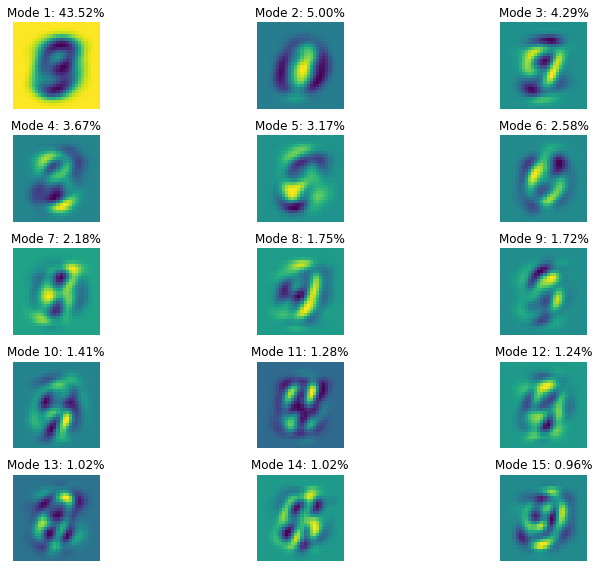

In [18]:
# print first 50 singular values
print(S[0:50])

# Plot singular values
plt.figure(figsize=(8, 8))
plt.stem(np.arange(0, S.size), S, cmap='viridis')
plt.colorbar()

# Set the title and axes labels
plt.title('Correlation Matrix of Selected Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Adjust the axes range and ticks
plt.xticks(np.arange(0, 10), image_indices)
plt.yticks(np.arange(0, 10), image_indices)


# Show the plot
plt.savefig('./Figures/correlation_matrix_10.jpg')
plt.show()

# Compute the total variance captured by all modes
total_variance_captured = np.sum(S ** 2)

# Compute the variance captured by each mode
variance_captured = (S ** 2) / total_variance_captured

# Convert the variance captured to percentage
percentage_variance_captured = variance_captured * 100

# Print the percentage of the variance captured by each mode
for i in range(6):
    print("Percentage of the variance captured by Mode {}: {:.2f}%".format(i+1, percentage_variance_captured[i]))

# Plot the first six modes as images
fig, axs = plt.subplots(5, 3, figsize=(12, 8))

for i in range(15):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(U[:, i].reshape(28, 28), cmap='viridis')
    axs[row, col].set_title('Mode {}: {:.2f}%'.format(i+1, percentage_variance_captured[i]))
    axs[row, col].axis('off')

plt.tight_layout()
plt.savefig('./Figures/first_6_modes.jpg')
plt.show()
